# Chapter 3. 신경망 (Neural Network)

**실습문제**: 본 문서에 나오는 파이썬/넘파이 스크립트에서 None과 pass로 표시된 곳을 찾아서 적절한 코드로 대체하시오.

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

- 다층 구조 (예, 2층 신경망 : 입력층 - layer 0, 은닉층 - layer 1, 출력층 - layer 2)
- 주: 아래 그림3-1의 신경망은 층이 3개이나 입력층은 가중치(weight)를 갖지 않으므로 2층 신경망이라 한다. 

- 입력층은 건물의 base라 생각하자.

![대체 텍스트](그림3-1.JPG)


### 3.1.2 퍼셉트론 복습

![대체 텍스트](식3-1.JPG)

위의 식을 아래와 같이 두개의 식으로 분리하면:

![대체 텍스트](식3-2.JPG)

## 3.2 활성화 함수 (activation function) - $h(x)$

### 3.2.1 계단 함수 (step function)

- 퍼셉트론의 활성화 함수

In [1]:
1>0

True

In [1]:
def step_function(x):    # x가 실수 (O), x가 numpy array (X)
    if x > 0:
        return 1
    else:
        return 0

In [2]:
def step_function(x):    # x가 numpy array (O)
    y = x > 0
    return y.astype(np.int)    # False -> 0, True -> 1로 만들어주는 코드

In [3]:
import numpy as np
x = np.array([-1, 1, 2])
step_function(x)

array([0, 1, 1])

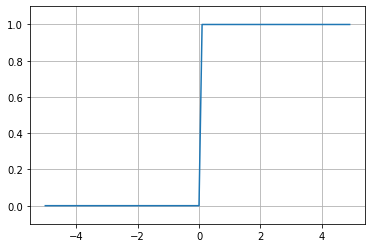

In [4]:
# 스텝 함수의 그래프

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

def step_function(x):    
    return np.array(x>0, dtype=np.int)  

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)    # y축의 범위 지정
plt.grid(True)
plt.show()

### 3.2.2 시그모이드 함수 (sigmoid function)

![대체 텍스트](식3-6.JPG)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

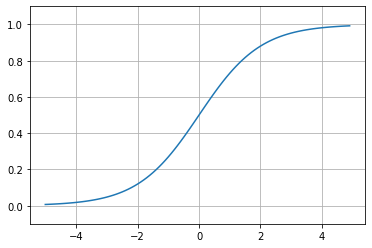

In [7]:
# 시그모이드 함수의 그래프

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)    # y축의 범위 지정
plt.grid(True)
plt.show()

**실습문제**: 아래 그림을 표현하는 파이썬/넘파이 스크립트를 작성하시오.

![대체 텍스트](그림3-8.JPG)

참고자료: https://wikidocs.net/13574

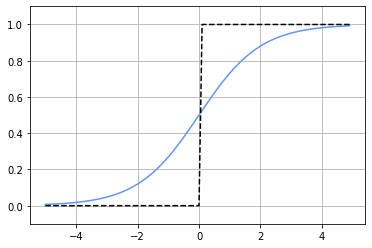

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

def step_function(x):    
    return np.array(x>0, dtype=np.int)  

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x, y2, color = 'cornflowerblue')
plt.plot(x, y1, linestyle='--', color = 'k')
plt.ylim(-0.1, 1.1)    # y축의 범위 지정
plt.grid(True)
plt.show()

### 3.2.3 ReLU 함수 (Rectified Linear Unit)

![대체 텍스트](그림3-9.JPG)

In [8]:
def relu(x):
    return np.maximum(0,x)

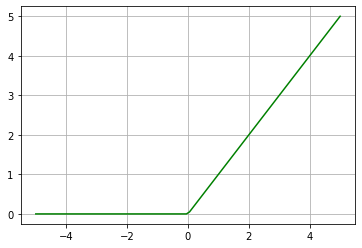

In [9]:
x = np.linspace(-5.0, 5.0, 100)
y1 = step_function(x)
y2 = sigmoid(x)
y3 = relu(x)
#plt.plot(x, y1, color='b', linestyle='--')
#plt.plot(x, y2, color='k')
plt.plot(x, y3, color='g')
#plt.ylim(-0.1, 1.1)    # y축의 범위 지정
plt.grid(True)
plt.show()

### 3.2.4 tanh 함수 (Hyperbolic tangent function)

![대체 텍스트](tanh-식.JPG)
![대체 텍스트](tanh-그림.JPG)

tanh와 sigmoid의 관계 : ![대체 텍스트](tanh-sigmoid-식.JPG)

참고자료: https://reniew.github.io/12/(tanh 그림),  http://taewan.kim/post/tanh_diff/(tanh 미분)

## 3.3 다차원 배열의 계산 (생략)

**신경망에서의 행렬 곱**

![대체 텍스트](그림3-14.JPG)

In [12]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5],[2,4,6]])
print(W)
Y = np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
[ 5 11 17]


## 3.4 3층 신경망 구현하기

![대체 텍스트](그림3-15.JPG)

### 3.4.1 표기법 설명

![대체 텍스트](그림3-16.JPG)

- x2에 대한 a1에서의 가중치라는 의미인듯.

### 3.4.2 각 층의 신호 전달 구현하기

![대체 텍스트](그림3-17.JPG)

![대체 텍스트](p85.JPG)

In [13]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print("W1.shape =", W1.shape)
print("X.shape =", X.shape)
print("B1.shape =", B1.shape)

A1 = np.dot(X, W1) + B1      # 여기에 None 대신에 적절한 코드를 입력하시오.
print("A1 =", A1, ", A1.shape =", A1.shape)

W1.shape = (2, 3)
X.shape = (2,)
B1.shape = (3,)
A1 = [0.3 0.7 1.1] , A1.shape = (3,)


![대체 텍스트](그림3-18.JPG)

In [14]:
Z1 = sigmoid(A1)

print("A1 =", A1)
print("Z1 =", Z1)

A1 = [0.3 0.7 1.1]
Z1 = [0.57444252 0.66818777 0.75026011]


![대체 텍스트](그림3-19.JPG)

In [17]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print("Z1.shape =", Z1.shape)
print("W2.shape =", W2.shape)
print("B2.shape =", B2.shape)

A2 = np.dot(Z1, W2) + B2      # 여기에 None 대신에 적절한 코드를 입력하시오.
Z2 = sigmoid(A2)      # 여기에 None 대신에 적절한 코드를 입력하시오.
print("A2 =", A2, ", A2.shape =", A2.shape)
print("Z2 =", Z2)

Z1.shape = (3,)
W2.shape = (3, 2)
B2.shape = (2,)
A2 = [0.51615984 1.21402696] , A2.shape = (2,)
Z2 = [0.62624937 0.7710107 ]


![대체 텍스트](그림3-20.JPG)

In [19]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

print("Z2.shape =", Z2.shape)
print("W3.shape =", W3.shape)
print("B3.shape =", B3.shape)

A3 = np.dot(Z2, W3) + B3      # 여기에 None 대신에 적절한 코드를 입력하시오.
Y = identity_function(A3)     
print("A3 =", A3, ", A3.shape =", A3.shape)
print("Y =", Y)

Z2.shape = (2,)
W3.shape = (2, 2)
B3.shape = (2,)
A3 = [0.31682708 0.69627909] , A3.shape = (2,)
Y = [0.31682708 0.69627909]


### 3.4.3 구현 정리

신경망 구현 관례에 따라 가중치만 W1과 같이 대문자로 쓰고, 편향과 중간결과 등은 모두 소문자 사용

In [20]:
def init_network():
    network = {}    # dictionary 생성
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):    # 입력 신호 x를 받아 신경망에서 순방향(입력에서 출력 방향)으로 신호가 전달됨 (순전파)
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1     # 여기에 None 대신에 적절한 코드를 입력하시오.
    z1 = sigmoid(a1)      # 여기에 None 대신에 적절한 코드를 입력하시오.
    a2 = np.dot(z1, W2) + b2      # 여기에 None 대신에 적절한 코드를 입력하시오.
    z2 = sigmoid(a2)      # 여기에 None 대신에 적절한 코드를 입력하시오.
    a3 = np.dot(z2, W3) + b3      # 여기에 None 대신에 적절한 코드를 입력하시오.
    y = identity_function(a3)     # 여기에 None 대신에 적절한 코드를 입력하시오.
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

- 회귀(regression) : 출력 층에 항등 함수를 주로 사용
- 분류(classification) : 출력 층에 시그모이드 또는 소프트맥스 함수를 주로 사용

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등 함수(identity function)는 입력을 그대로 출력함

![대체 텍스트](그림3-21.JPG)

소프트맥스 함수(softmax function): 

![대체 텍스트](식3-10.JPG)

![대체 텍스트](그림3-22.JPG)

In [22]:
def softmax(a):
    y = np.exp(a)/np.sum(np.exp(a))      # 여기에 None 대신에 적절한 코드를 입력하시오.
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


### 3.5.2 소프트맥스 함수 구현 시 주의점

소프트맥스 함수는 지수함수를 사용하는데 그 결과가 아주 큰 값이 되어 오버플로우가 발생할 수 있습니다.
이러한 문제를 해결하기 위하여 소프트맥스 함수를 아래와 같이 수정합니다:

![대체 텍스트](식3-11.JPG)

[식3.11]에서 $C^\prime$에 어떤 값을 대입해도 상관없지만, 입력 값 중 최대값의 음수값을 이용하는 것이 일반적입니다.
(위의 식유도는 c값에 뭐가 들어가든 저런 형식으로 들어가면 값은 동일하다는 의미이다.)

In [18]:
a = np.array([1010, 1000, 990])
softmax(a)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [25]:
def softmax(a):
    c = np.max(a)
    y = np.exp(a-c)/np.sum(np.exp(a-c))      # 여기에 None 대신에 적절한 코드를 입력하시오.
    return y

a = np.array([1010, 1000, 990])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 3.5.3 소프트맥스 함수의 특징

- 출력이 0과 1 사이의 실수
- 출력의 합은 1

=> 확률로 해석이 가능

In [20]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

### 3.5.4 출력층의 뉴런 수 정하기

![대체 텍스트](그림3-23.JPG)

## 3.6 손글씨 숫자 인식

- 신경망을 이용한 기계학습은 학습 단계와 추론(분류) 단계로 나뉜다.
- 이번 절에서는 학습 과정은 생략하고 이미 학습된 매개변수를 이용하여 손글씨를 분류하는 추론 과정만 구현함 -> 순전파 (forward propagation)
- 학습(training)은 다음 장에서 구현

### 3.6.1 MNIST 데이터셋

training images: 60,000개, test images: 10,000개, image pixels: 28x28 (gray)
![대체 텍스트](그림3-24.JPG)

In [1]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# flatten argument는 False이면 image shape을 원래 형태인 (1,28,28)의 3차원 배열로 유지, True이면 (784,)인 1차원 배열로 평탄하게 만듬
# normalize argument는 False이면 이미지 픽셀값이 0~255, True이면 0~1 

# 각 데이터의 형상 출력
print("x_train.shape =", x_train.shape)    # (60000, 784)
print("t_train.shape =", t_train.shape)    # (60000,)
print("x_test.shape =", x_test.shape)    # (10000, 784)
print("t_test.shape =", t_test.shape)    # (10000,)

x_train.shape = (60000, 784)
t_train.shape = (60000,)
x_test.shape = (10000, 784)
t_test.shape = (10000,)


**MNIST 이미지를 화면으로 불러오기:**

0
5
(784,)
(28, 28)


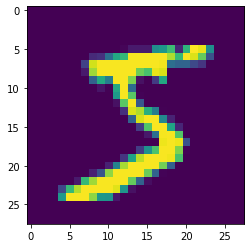

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
# my insert 2 lines below
from matplotlib.pyplot import imshow
%matplotlib inline  

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    # pil_img.show()  # my delete
    imshow(np.asarray(pil_img))  # my insert

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[1]
label = t_train[1]
print(label)
img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 원래 이미지의 모양으로 변형 
print(img.shape)  # (28, 28)

img_show(img)

![대체 텍스트](그림3-25.JPG)

**실습문제**: MNIST 데이터셋에서 처음 20개의 레이블과 이미지를 [그림3-24]와 같은 모양으로 출력하시오.

5
0
4
1
9
2
1
3
1
4
3
5
3
6
1
7
2
8
6
9


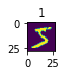

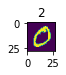

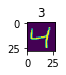

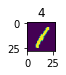

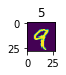

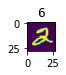

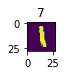

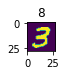

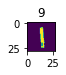

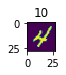

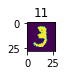

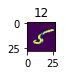

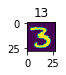

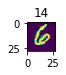

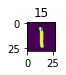

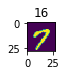

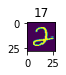

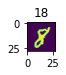

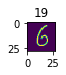

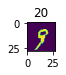

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline         

for i in range(20):
    print(t_train[i])
for i in range(20):
    img = x_train[i]
    label = t_train[i]
    img = img.reshape(28, 28)
    
    ax1 = plt.figure().add_subplot(2, 10, i+1)
    ax1.imshow(img)
    ax1.set_title(i+1)
    ax1.axis("on")



### 3.6.2 신경망의 추론 처리

**$\;\;$Neural network configuration :**
- input layer neurons: 784
- output layer neurons: 10
- 1st hidden layer neurons: 50
- 2nd hidden layer neurons: 100

bias는 neuron의 갯수만큼 있다. ex) number of 1st biases are 50.
아래 과정은 이미 누가 2층짜리 신경망으로 가중치까지 다 구해놓은 걸 실행만 해보는 것.

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test    

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)        # sample_weight.pkl 파일로부터 이미 학습된 가중치 매개변수를 읽어들인다.
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1    # 여기에 None 대신에 적절한 코드를 입력하시오.
    z1 = sigmoid(a1)    # 여기에 None 대신에 적절한 코드를 입력하시오.
    a2 = np.dot(z1, W2) + b2    # 여기에 None 대신에 적절한 코드를 입력하시오.
    z2 = sigmoid(a2)    # 여기에 None 대신에 적절한 코드를 입력하시오.
    a3 = np.dot(z2, W3) + b3    # 여기에 None 대신에 적절한 코드를 입력하시오.
    y = softmax(a3)     # 여기에 None 대신에 적절한 코드를 입력하시오.

    return y

x, t = get_data()    # 테스트 데이터만 가져 옴 
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다. 
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print(3)

Accuracy:0.9352
3


In [10]:
print(3)
a = 4
print(a)
b = 3
print("값은",a+b,  "이다.")

3
4
값은 7 이다.


### 3.6.3 배치 처리

In [6]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print("x.shape =", x.shape)
print("W1.shape =", W1.shape)
print("W2.shape =", W2.shape)
print("W3.shape =", W3.shape)

x.shape = (10000, 784)
W1.shape = (784, 50)
W2.shape = (50, 100)
W3.shape = (100, 10)


지금까지는 한번에 한장의 이미지를 처리:
![대체 텍스트](그림3-26.JPG)

여러장의 이미지를 한꺼번에 처리(배치 처리)하면:
![대체 텍스트](그림3-27.JPG)

**실습문제:** 3.6.2절에 나오는 파이썬 스크립트를 입력 데이터를 100개씩 묶어 배치 처리하는 스크립트로 변경하시오.

In [9]:
x, t = get_data()    # 테스트 데이터만 가져 옴 
network = init_network()

batch_size = 100    # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):             # 0부터 60,000까지의 index를 100개의 구간으로 나눔.(0, 100, 200, ...)
    x_batch = x[i:i+batch_size]                    # 여기에 None 대신에 적절한 코드를 입력하시오.
    y_batch = predict(network, x_batch)            # 여기에 None 대신에 적절한 코드를 입력하시오.
    p = np.argmax(y_batch, axis = 1)               # 여기에 None 대신에 적절한 코드를 입력하시오.
    accuracy_cnt += np.sum(p==t[i:i+batch_size])   # 여기에 None 대신에 적절한 코드를 입력하시오.

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [12]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(np.argmax(a, axis = 0))
print(np.argmax(a, axis = 1))


[[1 2 3]
 [4 5 6]]
[1 1 1]
[2 2]


**힌트 1:** nx3 소프트맥스 행렬에서 각 행별 최대값을 가진 열의 인덱스를 출력하는 방법

In [28]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


**힌트 2:** 두개의 1차원 배열에서 각 원소별로 같은 값을 가지는 원소가 몇 개인지를 세는 방법

In [29]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3